# NOTE:Pandas
main data types : Series (處理時間序列,主要為一維陣列), DataFrame（處理結構化資料,如關聯式資料庫csv等等）

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read CSV file and HTML
```
df = pd.read_csv("filename",encoding="ISO-8859-1/utf-8")
ds = pd.read_html("http://...//")
```

In [2]:
filepath = "../data/"
filename = "application_test.csv"
f_app = os.path.join(filepath,filename)
data = pd.read_csv(f_app)
#在 jupyter notebook 中，可以使用 ? 來調查函數的定義
?pd.read_csv

### Create Series

In [3]:
#1
arr = ["A","B","C","D"]
select = pd.Series(arr)
print(select)
print("")

#2
dictionary = {
    "aaa": "111",
    "bbb": "222",
    "ccc": "333",
    "ddd": "444",
    "eee": "555"
} 
select = pd.Series(dictionary,index = dictionary.keys())
print(select[[0,2,3]])

0    A
1    B
2    C
3    D
dtype: object

aaa    111
ccc    333
ddd    444
dtype: object


### Create  DataFrame

In [8]:
#1
form = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}
visitors_1 = pd.DataFrame(form)
print(visitors_1)
print("")

#2
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))

visitors_2 = pd.DataFrame(dict(zipped))
print(visitors_2)
print("")

#3
family=[["Amy","26"],["Jimmy","25"],["Jeff","23"],["Sonia","18"]]
df = pd.DataFrame(family,index = ['a','b','c','d'],columns=["name","age"])
print(df)

#4
df = pd.DataFrame(data)

  weekday    city  visitor
0     Sun  Austin      139
1     Sun  Dallas      237
2     Mon  Austin      326
3     Mon  Dallas      456

     city weekday  visitor
0  Austin     Sun      139
1  Dallas     Sun      237
2  Austin     Mon      326
3  Dallas     Mon      456

    name age
a    Amy  26
b  Jimmy  25
c   Jeff  23
d  Sonia  18


### Series & DataFrame 屬性 

In [9]:
# Series
s = pd.Series([4, 7, -5, 3.3])
s.values
print(s.index)

RangeIndex(start=0, stop=4, step=1)


In [11]:
# DataFrame
#df = pd.DataFrame(s,index = range(s.size),columns = ["S_value"])
df.shape        # 回傳列數與欄數 
df.describe()   # 回傳描述性統計
df.head(3)      # 回傳前n筆觀測值
df.tail(3)      # 回傳後n筆觀測值 
df.index        # 回傳 index 
df.info         # 回傳資料內容 
df.columns      # 回傳欄位名稱  
#df.columns.value.tolist()
print(df.shape)

(48744, 121)


### 資料選擇及新增
* DataFrame["New Cols Name"] = value
* DataFrame.insert(3,column="sport",value="Basketball")
* DataFrame.loc(row_label,col_label) 
* DataFrame.iloc(row_index,col_index)

In [12]:
df["AMT_INCOME_TOTAL"]
df["AMT_INCOME_TOTAL"][0:4]
df[["SK_ID_CURR","AMT_INCOME_TOTAL"]]
df.loc[0:3,"SK_ID_CURR":"AMT_INCOME_TOTAL"]
df.iloc[0:2,10:13] #take 0~2 rows 10~13 cols

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,Unaccompanied,Working,Higher education
1,Unaccompanied,Working,Secondary / secondary special


### 資料排序

In [13]:
sorteddf = df.sort_index(axis = 0, ascending = True)
sorteddf = df.sort_values(by = "AMT_INCOME_TOTAL")
sorteddf.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19883,244403,Cash loans,F,N,Y,0,26941.5,229500.0,11848.5,229500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
4027,128720,Cash loans,F,N,Y,0,27000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
8593,162802,Cash loans,F,N,Y,0,27000.0,148140.0,7690.5,112500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
47425,446665,Cash loans,F,N,Y,0,27000.0,601470.0,30838.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7375,153924,Cash loans,F,Y,N,1,27000.0,450000.0,19048.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


### 判斷是否為空值

In [14]:
df.isnull()
df.notnull()
df.dropna()   # 有遺失值的觀測值都刪除  
df.fillna(0)  # 有遺失值的觀測值填補0

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### DataFrame運算
```
* df['Tag'].sum()
* df['Tag'].mean()
* df['Tag'].count()
* df['Tag'].min()
* df['Tag'].max()
* data['region'].value_counts()
* data['col'].unique()

* df['Tag'].cumsum()   # Cumulative sum of preTestScores, moving from the rows from the top
* df['Tag'].median()   # Median value of preTestScore
* df['Tag'].var()      # Sample variance of preTestScore values
* df['Tag'].std()      # Sample standard deviation of preTestScore values
* df['Tag'].skew()     # Skewness of preTestScore values
* df['Tag'].kurt()     # Kurtosis of preTestScore values
* df.corr()            # Correlation Matrix Of Values
* df.cov()             # Covariance Matrix Of Values
```

In [2]:
#Interquartile range
#Q1 = df["AMT_INCOME_TOTAL"].quantile(0.25)
#Q3 = df["AMT_INCOME_TOTAL"].quantile(0.75)
#print(Q1,Q3)

#unique 唯一值
obj=pd.Series(['c','a','d','a','a','b','b','c','c','c'])
obj.unique()


array(['c', 'a', 'd', 'b'], dtype=object)

### Groupby
* [Pandas Groupby使用！](https://ithelp.ithome.com.tw/articles/10194027)

<class 'pandas.core.groupby.generic.SeriesGroupBy'>
weekday
Mon    2
Sun    2
Name: visitor, dtype: int64


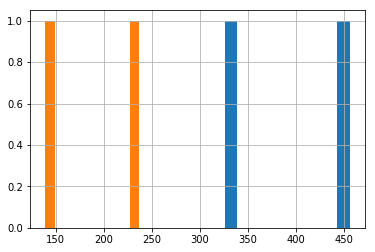

2    326
3    456
Name: visitor, dtype: int64

In [26]:
v=visitors_1.groupby(by="weekday")['visitor']
print( type(v) )
print( v.size())
v.hist()
plt.show()
#show the groups
v.groups

# Get the groups
v.get_group("Mon")

### Merge & Transform

In [20]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['A2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
# 沿縱軸合併
result = pd.concat([df1, df2, df3])
print(result)

# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
print(result)

result = pd.concat([df1, df4], axis = 1, join = 'inner') # 硬串接
print(result)

result = pd.merge(df1, df4, how='inner')
print(result)

# 將 欄-列 逐一解開
print(df1)
df1.melt()


      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   A2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7
    A   B   C   D   B   D   F
2  A2  B2  C2  D2  A2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3
    A   B   C   D   F
0  A3  B3  C3  D3  F3
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


,variable,value
0,A,A0
1,A,A1
2,A,A2
3,A,A3
4,B,B0
5,B,B1
6,B,B2
7,B,B3
8,C,C0
9,C,C1


### 繪圖
* 线型图
```
Series和DF都有一个用于生成各类图表的plot方法. 默认情况下, 它们所生成的是线型图
```
* 柱状图
```
在生成线型图的代码中加上kind='bar'或kind='barh'即可生成柱状图. 这时, Series和DF的索引将会用作X或Y刻度
```
* 直方图和密度图
```
直方图(histogram)是一种可以对值频率进行离散化显示的柱状图. 数据点被拆分到离散的, 间隔均匀的面元中, 绘制的是各面元中数据点的数量
```
* 散布图

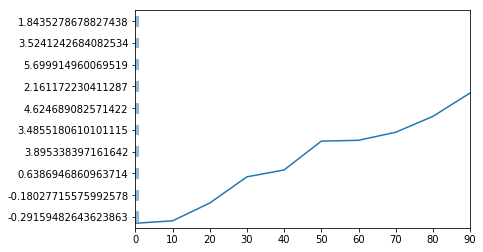

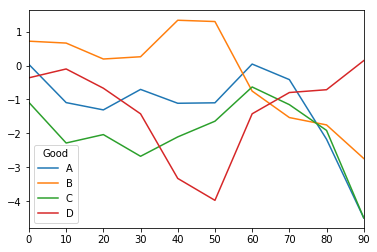

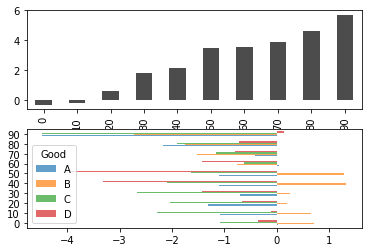

In [33]:
# Line Chart 
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
s.value_counts().plot(kind='barh',alpha = 0.5)

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=pd.Index(['A', 'B', 'C', 'D'],name="Good"), index=np.arange(0, 100, 10))
df.plot()
fig,axes = plt.subplots(2, 1)
# Bar Chart
s.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
df.plot(kind='barh',ax=axes[1],alpha=0.7)


柱状图

# Reference
* [Pandas dtypes 数据类型](https://blog.csdn.net/claroja/article/details/72622375)
* [Pandas 繪圖](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)
* [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* [pandas的cut&qcut函數](https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc)